In [831]:
# get data and rename columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import datetime as dt

fardina=pd.read_csv('FardinaResponses.csv')
max=pd.read_csv('MaxResponses.csv')
merged = pd.read_csv('DatasetGeneration.csv')


fardina.columns = ['Timestamp', 'Class', 'Age', 'Parents_stance', 'Personal_stance', 
               'Religious_rating', 'Gender', 'Compassionate?', 'AITA_Ibuprofen', 
               'AITA_married', 'AITA_trustfund', 'AITA_separatefinances', 'AITA_cat',
               'AITA_daughter', 'AITA_plane', 'AITA_uneven_childsupport', 
               'AITA_lower_cihldsupport', 'AITA_dentist_teacher', 'AITA_uninvite', 
               'AITA_lgbtq', 'AITA_drinking','AITA_hairdye']

max.columns = ['Timestamp', 'Class', 'Age', 'Parents_stance', 'Personal_stance', 
               'Religious_rating', 'Gender', 'AITA_Ibuprofen', 
               'AITA_married', 'AITA_trustfund', 'AITA_separatefinances', 'AITA_cat',
               'AITA_daughter', 'AITA_plane', 'AITA_uneven_childsupport', 
               'AITA_lower_cihldsupport', 'AITA_dentist_teacher', 'AITA_uninvite', 
               'AITA_lgbtq', 'AITA_drinking','AITA_hairdye']
merged.columns = ['Timestamp', 'Class', 'Age', 'Parents_stance', 'Personal_stance', 
               'Religious_rating', 'Gender', 'Compassionate?', 'AITA_Ibuprofen', 
               'AITA_married', 'AITA_trustfund', 'AITA_separatefinances', 'AITA_cat',
               'AITA_daughter', 'AITA_plane', 'AITA_uneven_childsupport', 
               'AITA_lower_cihldsupport', 'AITA_dentist_teacher', 'AITA_uninvite', 
               'AITA_lgbtq', 'AITA_drinking','AITA_hairdye']
merged.isna().sum()


Timestamp                    0
Class                        3
Age                          4
Parents_stance               4
Personal_stance              4
Religious_rating             4
Gender                       4
Compassionate?              99
AITA_Ibuprofen               5
AITA_married                 5
AITA_trustfund               7
AITA_separatefinances        9
AITA_cat                     7
AITA_daughter                8
AITA_plane                  10
AITA_uneven_childsupport    12
AITA_lower_cihldsupport     13
AITA_dentist_teacher         8
AITA_uninvite               11
AITA_lgbtq                  11
AITA_drinking               11
AITA_hairdye                 9
dtype: int64

In [832]:
# Clean up data

# drop 50
merged=merged.loc[(merged['Age'] != '50+') & (merged['Age'] != '40')]

# drop no answers
merged.dropna(subset=['Age'], inplace=True)
merged['Age'] = pd.to_numeric(merged['Age'])

#print(plt.boxplot(merged['Age'], vert=False))


# drop if half columns in those listed are not answered
merged.dropna(thresh= 9 ,subset=['AITA_Ibuprofen', 'AITA_married', 'AITA_trustfund', 'AITA_separatefinances', 
                                  'AITA_cat', 'AITA_daughter', 'AITA_plane', 'AITA_uneven_childsupport', 
                                  'AITA_lower_cihldsupport', 'AITA_dentist_teacher', 'AITA_uninvite', 
                                  'AITA_lgbtq', 'AITA_drinking','AITA_hairdye'], inplace=True)

merged.reset_index(drop=True, inplace=True)

# replace NaN values with most frequent response of that column
for column in ['AITA_Ibuprofen', 'AITA_married', 'AITA_trustfund', 'AITA_separatefinances', 
                                  'AITA_cat', 'AITA_daughter', 'AITA_plane', 'AITA_uneven_childsupport', 
                                  'AITA_lower_cihldsupport', 'AITA_dentist_teacher', 'AITA_uninvite', 
                                  'AITA_lgbtq', 'AITA_drinking','AITA_hairdye']:
    merged[column].fillna(merged[column].mode()[0],inplace=True)
    
merged['Strongly_Jerk']=merged.apply(lambda x: x.str.contains("Strongly a jerk").sum(),axis=1)
merged['Mildly_Jerk']=merged.apply(lambda x: x.str.contains("Mildly a jerk").sum(),axis=1)
merged['Not_Jerk']=merged.apply(lambda x: x.str.contains("Not a jerk").sum(),axis=1)


merged['Time']=pd.to_datetime(merged['Timestamp']).dt.hour
bin_labels = ['Morning', 'Afternoon', 'Evening','Night']
bin_edges=[0,10,13,20,24]
merged['Time'] = pd.cut(merged['Time'], bins=bin_edges, labels = bin_labels)
    
merged


,Timestamp,Class,Age,Parents_stance,Personal_stance,Religious_rating,Gender,Compassionate?,AITA_Ibuprofen,AITA_married,...,AITA_lower_cihldsupport,AITA_dentist_teacher,AITA_uninvite,AITA_lgbtq,AITA_drinking,AITA_hairdye,Strongly_Jerk,Mildly_Jerk,Not_Jerk,Time
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,4,5,5,Evening
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,3,4,7,Evening
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,2,5,7,Evening
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,1,3,10,Evening
4,9/23/2023 18:10:13,Other,25,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,2,4,8,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10/8/2023 13:20:38,Other,17,Neutral,Mildly liberal,Somewhat spiritual,Prefer not to say,NaN,Not a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,5,3,6,Afternoon
221,10/12/2023 15:52:02,Junior,19,Strongly liberal,Strongly conservative,Not spiritual at all,Female,NaN,Not a jerk,Mildly a jerk,...,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Strongly a jerk,7,4,3,Evening
222,10/16/2023 22:34:59,Junior,20,Strongly conservative,Mildly liberal,Not spiritual at all,Male,NaN,Mildly a jerk,Strongly a jerk,...,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,4,4,6,Night
223,10/17/2023 1:47:30,Junior,20,Strongly conservative,Mildly conservative,Somewhat spiritual,Male,NaN,Mildly a jerk,Not a jerk,...,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,6,3,5,Morning


     Strongly_Jerk  Mildly_Jerk  Not_Jerk
Age                                      
17               9            5        14
18              22           21        41
19             161          237       302
20             372          548       634
21             127          186       233
22              15           20        35
23              18           27        25
24              15            3        10
25               5           14         9
26               2           10         2
28               0            8         6
29               6            2         6


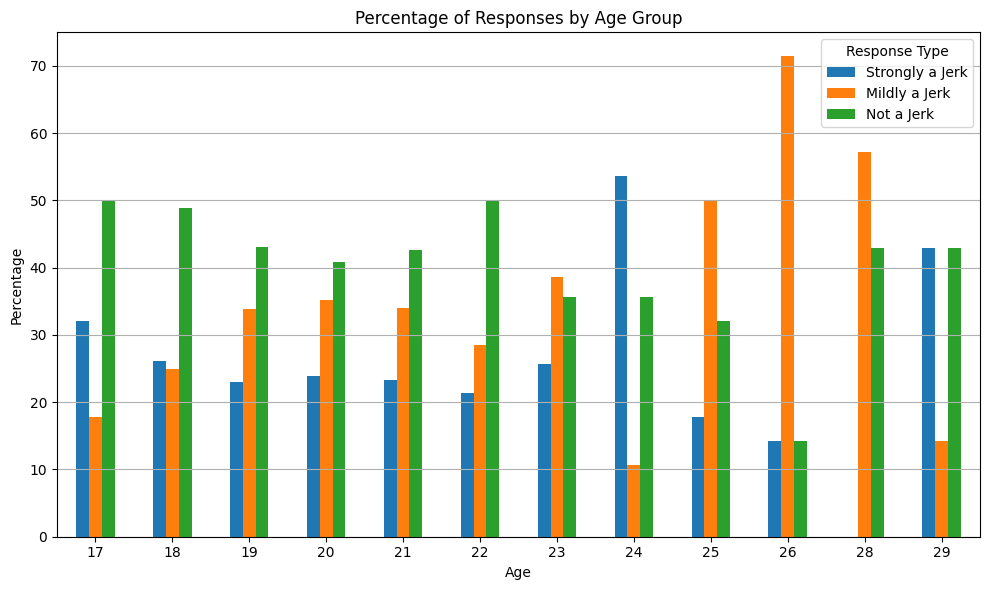

In [833]:
# Question 1: Is there a trend or pattern in the "AITJ" responses based on age

grouped = merged[['Age','Strongly_Jerk', 'Mildly_Jerk', 'Not_Jerk']].groupby('Age').sum()
print(grouped)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100


ax = grouped_percentage.plot(kind="bar", stacked=False, figsize=(10,6))

plt.title("Percentage of Responses by Age Group")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Response Type", labels=["Strongly a Jerk", "Mildly a Jerk", "Not a Jerk"])
plt.grid(axis="y")
plt.show()


Response  Strongly a Jerk  Mildly a Jerk  Not a Jerk
Class                                               
Freshman                1              3          10
Sophmore              113            188         231
Junior                488            679         835
Senior                136            197         213
Other                  14             14          28
Chi2ContingencyResult(statistic=11.711281613691126, pvalue=0.16455809888332337, dof=8, expected_freq=array([[  3.34222222,   4.80444444,   5.85333333],
       [127.00444444, 182.56888889, 222.42666667],
       [477.93777778, 687.03555556, 837.02666667],
       [130.34666667, 187.37333333, 228.28      ],
       [ 13.36888889,  19.21777778,  23.41333333]]))


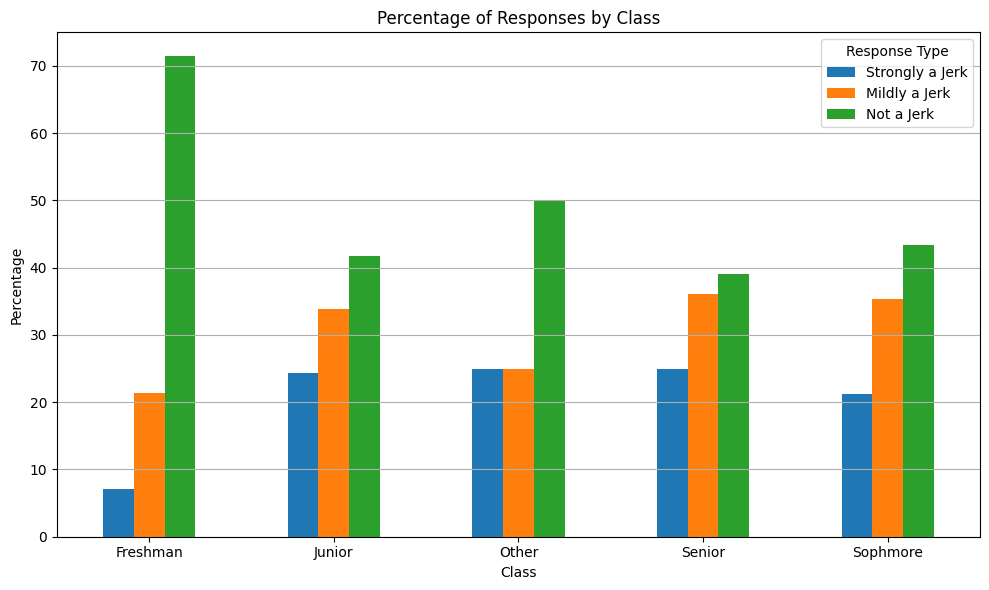

In [834]:
# Is there a significant difference in “AITJ” responses between class groups?
# Null: There is no association between class year and “AITJ” responses
# Alternative: There is an association between class year and “AITJ” responses
#Chi-squared test for independence
grouped = merged[['Class','Strongly_Jerk', 'Mildly_Jerk', 'Not_Jerk']].groupby('Class').sum()

data=pd.DataFrame({'Class':[],'Response':[]})

for index,row in grouped.iterrows():
    for i in range(row['Strongly_Jerk']):
        data.loc[len(data.index)] = [index,'Strongly a Jerk']
    for i in range(row['Mildly_Jerk']):
        data.loc[len(data.index)] = [index,'Mildly a Jerk']
    for i in range(row['Not_Jerk']):
        data.loc[len(data.index)] = [index,'Not a Jerk']
        
#correct_order = ['Strongly a Jerk', 'Mildly a Jerk', 'Not a Jerk']
crosstab = pd.crosstab(data['Class'],data['Response'])
crosstab=crosstab.reindex(['Strongly a Jerk', 'Mildly a Jerk', 'Not a Jerk'],axis='columns').reindex(['Freshman','Sophmore', 'Junior', 'Senior', 'Other'])
print(crosstab)

print(scipy.stats.chi2_contingency(crosstab))

grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100


ax = grouped_percentage.plot(kind="bar", stacked=False, figsize=(10,6))

plt.title("Percentage of Responses by Class")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Response Type", labels=["Strongly a Jerk", "Mildly a Jerk", "Not a Jerk"])
plt.grid(axis="y")

plt.show()

In [835]:
# Does time play a role in AITJ responses
grouped = merged[['Time', 'Strongly_Jerk', 'Mildly_Jerk','Not_Jerk']].groupby('Time').sum()
print(grouped)



           Strongly_Jerk  Mildly_Jerk  Not_Jerk
Time                                           
Morning               92          103       155
Afternoon             95          165       146
Evening              345          450       563
Night                198          346       436


/var/folders/lf/cvdhbf5d6k98w1t2j0rh386w0000gn/T/ipykernel_86100/1914662283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged[['Time', 'Strongly_Jerk', 'Mildly_Jerk','Not_Jerk']].groupby('Time').sum()
